In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df1 = pd.read_csv("data/train.csv")
df2 = pd.read_csv("data/meal_info.csv")
df3 = pd.read_csv("data/fulfilment_center_info.csv")

In [3]:
df = pd.merge(df1, df2,  on="meal_id", how="outer")

In [4]:
dff = pd.merge(df, df3, on="center_id", how="outer")

In [5]:
dff

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,Fish,Continental,473,77,TYPE_A,4.5
456544,1060716,142,61,2104,581.03,582.03,0,0,42,Fish,Continental,473,77,TYPE_A,4.5
456545,1029231,143,61,2104,583.03,581.03,0,0,40,Fish,Continental,473,77,TYPE_A,4.5
456546,1141147,144,61,2104,582.03,581.03,0,0,53,Fish,Continental,473,77,TYPE_A,4.5


In [6]:
dff.tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
456543,1437396,141,61,2104,583.03,630.53,0,1,13,Fish,Continental,473,77,TYPE_A,4.5
456544,1060716,142,61,2104,581.03,582.03,0,0,42,Fish,Continental,473,77,TYPE_A,4.5
456545,1029231,143,61,2104,583.03,581.03,0,0,40,Fish,Continental,473,77,TYPE_A,4.5
456546,1141147,144,61,2104,582.03,581.03,0,0,53,Fish,Continental,473,77,TYPE_A,4.5
456547,1443704,145,61,2104,581.03,582.03,0,0,27,Fish,Continental,473,77,TYPE_A,4.5


# Data Preprocessing

In [7]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [8]:
dff.duplicated().sum()

0

In [9]:
dff.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [10]:
dff.meal_id.nunique()

51

In [11]:
dff.cuisine.nunique()

4

In [12]:
dff.city_code.nunique()

51

# EDA

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
# plt.subplots(figsize=(40,15))
# sns.barplot(x= 'meal_id', y='num_orders',data=dff)

In [15]:
# plt.subplots(figsize=(40,15))
# sns.barplot(x= 'checkout_price', y='num_orders',data=dff)

In [16]:
# sns.barplot(x= 'emailer_for_promotion', y='num_orders',data=dff)

In [17]:
# sns.barplot(x= 'center_type', y='num_orders',data=dff)

<AxesSubplot:ylabel='Density'>

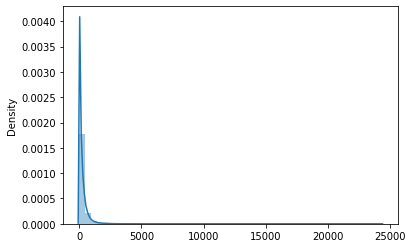

In [18]:
sns.distplot(x=dff['num_orders'])

In [19]:
# plt.subplots(figsize=(15,7))
# plt.scatter(df['center_id'],df['num_orders'])

In [20]:
# plt.subplots(figsize=(15,7))
# plt.scatter(df['center_id'],df['base_price'])

# Outliers Treatment

<AxesSubplot:xlabel='num_orders'>

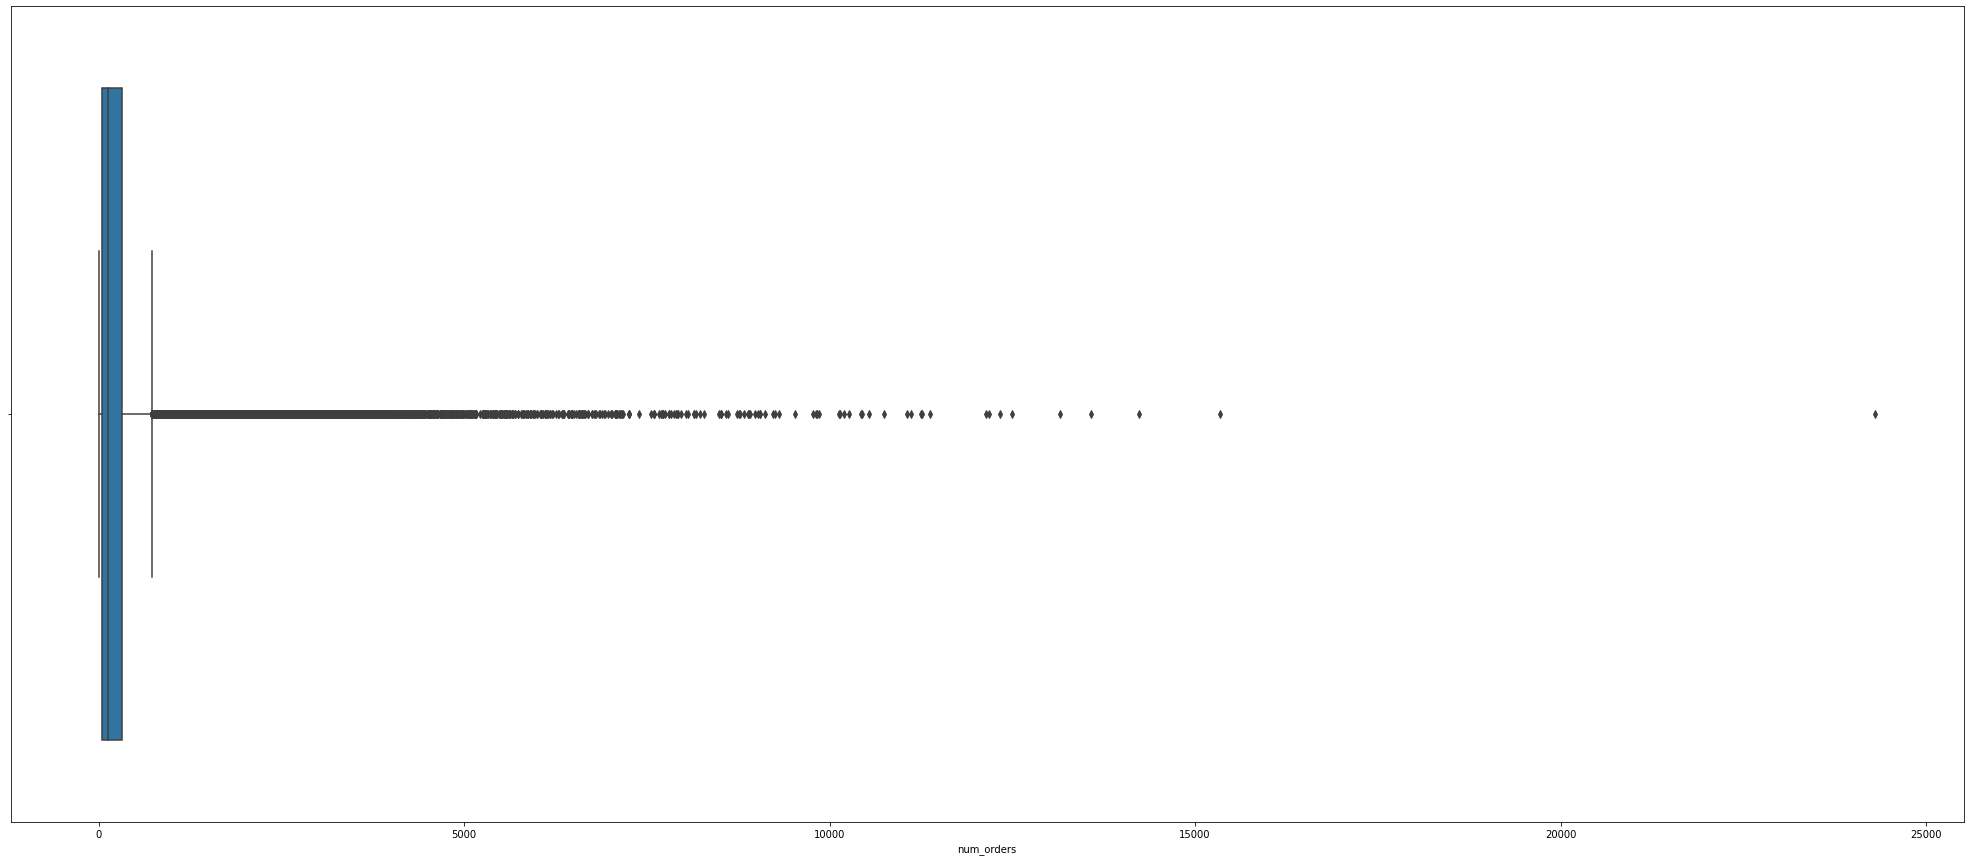

In [21]:
plt.subplots(figsize=(35,15))
sns.boxplot(dff['num_orders'])

In [22]:
q1=dff.num_orders.quantile(0.25)
q3=dff.num_orders.quantile(0.75)
q1,q3

(54.0, 324.0)

In [23]:
IQR=q3-q1
IQR

270.0

In [24]:
lower_bound=q1-3*IQR
upper_bound=q3+3*IQR
lower_bound,upper_bound

(-756.0, 1134.0)

In [25]:
index = dff[(dff['num_orders'] >=6000)].index
dff.drop(index, inplace=True)
           

In [26]:
dff.shape

(456394, 15)

# Train-Test Split

In [27]:
from sklearn.model_selection import train_test_split

x = dff.drop('num_orders', axis=1)
y = dff['num_orders']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
x_train.shape, x_test.shape

((410754, 14), (45640, 14))

# Feature Engg. & Selection

In [28]:
x_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
1324,1093119,104,55,1207,324.98,323.01,0,1,Beverages,Continental,647,56,TYPE_C,2.0
26992,1009417,23,32,2867,658.63,659.63,0,0,Seafood,Continental,526,34,TYPE_A,3.8
361445,1466848,64,143,2826,269.66,329.86,1,0,Sandwich,Italian,562,77,TYPE_B,3.8
207221,1325427,20,64,2322,307.49,309.49,0,0,Beverages,Continental,553,77,TYPE_A,4.4
338520,1422659,19,30,1878,280.33,281.33,0,0,Starters,Thai,604,56,TYPE_A,3.5


In [29]:
from sklearn.preprocessing import LabelEncoder
cuis_d = pd.get_dummies(x_train.cuisine, prefix='cuisine')
x_train = pd.concat([x_train,cuis_d],axis=1)

cat_d = pd.get_dummies(x_train.category, prefix='category')
x_train = pd.concat([x_train,cat_d],axis=1)

cent_d = pd.get_dummies(x_train.center_type, prefix='center_type')
x_train = pd.concat([x_train,cent_d],axis=1)

meal_d = pd.get_dummies(x_train.meal_id, prefix='meal_id')
x_train = pd.concat([x_train,meal_d],axis=1)

op_area_d = pd.get_dummies(x_train.op_area, prefix='op_area')
x_train = pd.concat([x_train,op_area_d],axis=1)

In [30]:
x_train["Discount"]=((x_train["base_price"]-x_train["checkout_price"])/x_train["base_price"])*100


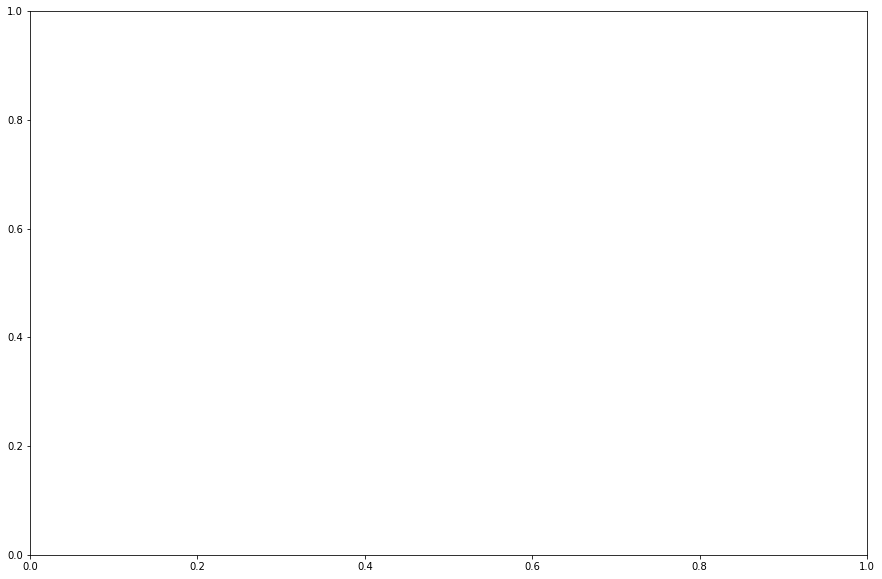

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
# sns.heatmap(x_train.merge(y_train , on = x_train.index ).corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

In [32]:
x_train.drop(['week','meal_id','category','cuisine','city_code','region_code','center_type','op_area'],axis=1,inplace=True)

In [33]:
x_train.head()

,id,center_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,...,op_area_4.7,op_area_4.8,op_area_5.0,op_area_5.1,op_area_5.3,op_area_5.6,op_area_6.3,op_area_6.7,op_area_7.0,Discount
1324,1093119,55,324.98,323.01,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.609888
26992,1009417,32,658.63,659.63,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.151600
361445,1466848,143,269.66,329.86,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,18.250167
207221,1325427,64,307.49,309.49,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.646224
338520,1422659,30,280.33,281.33,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.355454


In [34]:
cuis_d = pd.get_dummies(x_test.cuisine, prefix='cuisine')
x_test = pd.concat([x_test,cuis_d],axis=1)

cat_d = pd.get_dummies(x_test.category, prefix='category')
x_test = pd.concat([x_test,cat_d],axis=1)

cent_d = pd.get_dummies(x_test.center_type, prefix='center_type')
x_test = pd.concat([x_test,cent_d],axis=1)

meal_d = pd.get_dummies(x_test.meal_id, prefix='meal_id')
x_test = pd.concat([x_test,meal_d],axis=1)

op_area_d = pd.get_dummies(x_test.op_area, prefix='op_area')
x_test = pd.concat([x_test,op_area_d],axis=1)

In [35]:
x_test["Discount"]=((x_test["base_price"]-x_test["checkout_price"])/x_test["base_price"])*100

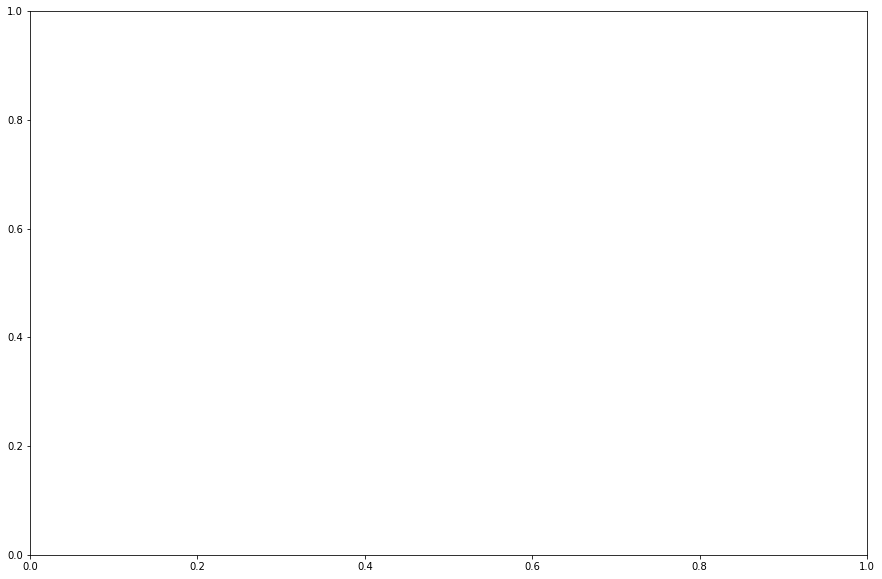

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
# sns.heatmap(x_train.merge(y_train , on = x_train.index ).corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

In [37]:
x_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,...,op_area_4.7,op_area_4.8,op_area_5.0,op_area_5.1,op_area_5.3,op_area_5.6,op_area_6.3,op_area_6.7,op_area_7.0,Discount
169756,1147837,18,36,1878,280.33,281.33,0,0,Starters,Thai,...,0,0,0,0,0,0,0,0,0,0.355454
195136,1000904,72,157,1778,164.90,164.90,0,0,Beverages,Italian,...,0,0,0,0,0,0,0,0,0,0.000000
335995,1117241,100,30,2640,291.03,291.03,0,0,Starters,Thai,...,0,0,0,0,0,0,0,0,0,0.000000
447608,1192766,104,51,1962,680.03,680.03,0,0,Pizza,Continental,...,0,0,0,0,0,0,0,0,1,0.000000
400781,1044242,74,65,2704,247.35,291.03,0,0,Other Snacks,Thai,...,0,1,0,0,0,0,0,0,0,15.008762


In [38]:
x_test.drop(['week','meal_id','category','cuisine','city_code','region_code','center_type','op_area'],axis=1,inplace=True)

In [39]:
x_test.shape

(45640, 109)

In [40]:
x_train.shape

(410754, 109)

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
rfr = RandomForestRegressor(n_estimators=120,max_features=70)
rfr.fit(x_train,y_train)


RandomForestRegressor(max_features=70, n_estimators=120)

In [57]:
y_pred = rfr.predict(x_test)
y_pred

array([ 158.75      ,   94.75833333,  266.95      , ...,  189.71666667,
         95.8       , 1017.1       ])

In [58]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error( y_test, y_pred ))

0.5225061320500796

In [44]:
df4 = pd.read_csv('test_Q.csv')
df5 = pd.merge(df4, df2,  on="meal_id", how="outer")
dft = pd.merge(df5,df3, on='center_id', how='outer') 
dft.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1262649,147,55,1885,159.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1453211,149,55,1885,157.14,158.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,1262599,150,55,1885,159.14,157.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
4,1495848,151,55,1885,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0


In [45]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
 8   category               32573 non-null  object 
 9   cuisine                32573 non-null  object 
 10  city_code              32573 non-null  int64  
 11  region_code            32573 non-null  int64  
 12  center_type            32573 non-null  object 
 13  op_area                32573 non-null  float64
dtypes: float64(3), int64(8), object(3)
memory usage: 3.7+ 

In [46]:
dft.shape

(32573, 14)

In [47]:
cuis_d = pd.get_dummies(dft.cuisine, prefix='cuisine')
dft = pd.concat([dft,cuis_d],axis=1)

cat_d = pd.get_dummies(dft.category, prefix='category')
dft = pd.concat([dft,cat_d],axis=1)

cent_d = pd.get_dummies(dft.center_type, prefix='center_type')
dft = pd.concat([dft,cent_d],axis=1)

meal_d = pd.get_dummies(dft.meal_id, prefix='meal_id')
dft = pd.concat([dft,meal_d],axis=1)

op_area_d = pd.get_dummies(dft.op_area, prefix='op_area')
dft = pd.concat([dft,op_area_d],axis=1)

In [48]:
dft["Discount"]=((dft["base_price"]-dft["checkout_price"])/dft["base_price"])*100

In [49]:
dft.drop(['week','meal_id','category','cuisine','city_code','region_code','center_type','op_area'],axis=1,inplace=True)

In [50]:
dft.shape

(32573, 109)

In [51]:
y_preddd = rfr.predict(dft)

In [52]:
df_final = pd.read_csv('sample.csv')
df_final['num_orders'] = y_preddd
df_final['id'] = dft['id']


In [53]:
df_final.to_csv("raFor.csv")

In [54]:
dft['id'] = df4['id']
dft

,id,center_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,...,op_area_4.7,op_area_4.8,op_area_5.0,op_area_5.1,op_area_5.3,op_area_5.6,op_area_6.3,op_area_6.7,op_area_7.0,Discount
0,1028232,55,158.11,159.11,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.628496
1,1127204,55,159.11,159.11,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.000000
2,1212707,55,157.14,158.14,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.632351
3,1082698,55,159.14,157.14,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,-1.272750
4,1400926,55,160.11,159.11,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,-0.628496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,1250239,61,583.03,581.03,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.344216
32569,1039516,61,582.03,582.03,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
32570,1158107,61,629.53,629.53,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
32571,1444235,61,629.53,629.53,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [55]:
df_final

,id,num_orders
0,1028232,153.275
1,1262649,153.250
2,1453211,108.725
3,1262599,152.150
4,1495848,142.850
...,...,...
32568,1412025,44.525
32569,1287019,76.500
32570,1396176,38.525
32571,1331977,31.325
